<a href="https://colab.research.google.com/github/SpringBoardMentor193s/SentinelNet_Oct_Batch/blob/laxmisahitya/flag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load data
column_names = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
    'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins',
    'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
    'num_root', 'num_file_creations', 'num_shells', 'num_access_files',
    'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
    'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
    'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
    'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
    'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate', 'dst_host_srv_serror_rate',
    'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'class', 'difficulty'
]

extracted_dir = "/content/extracted_data/nsl-kdd"
renamed_file_name = "KDDTrain+.txt"
file_path = os.path.join(extracted_dir, renamed_file_name)

# Check if the file exists before attempting to read
if os.path.exists(file_path):
    print(f"Loading data from {file_path}...")
    train_df = pd.read_csv(file_path, header=None, names=column_names)
    train_df.drop(['difficulty'], axis=1, inplace=True)
    train_df['attack_binary'] = train_df['class'].apply(lambda x: 0 if x == 'normal' else 1)
    print("Data loaded successfully.")
else:
    print(f"Error: Data file not found at {file_path}. Please ensure the extraction process completed correctly.")
    # Optionally, create an empty DataFrame or handle the error as needed
    # train_df = pd.DataFrame(columns=column_names) # Example: create empty df

Loading data from /content/extracted_data/nsl-kdd/KDDTrain+.txt...
Data loaded successfully.


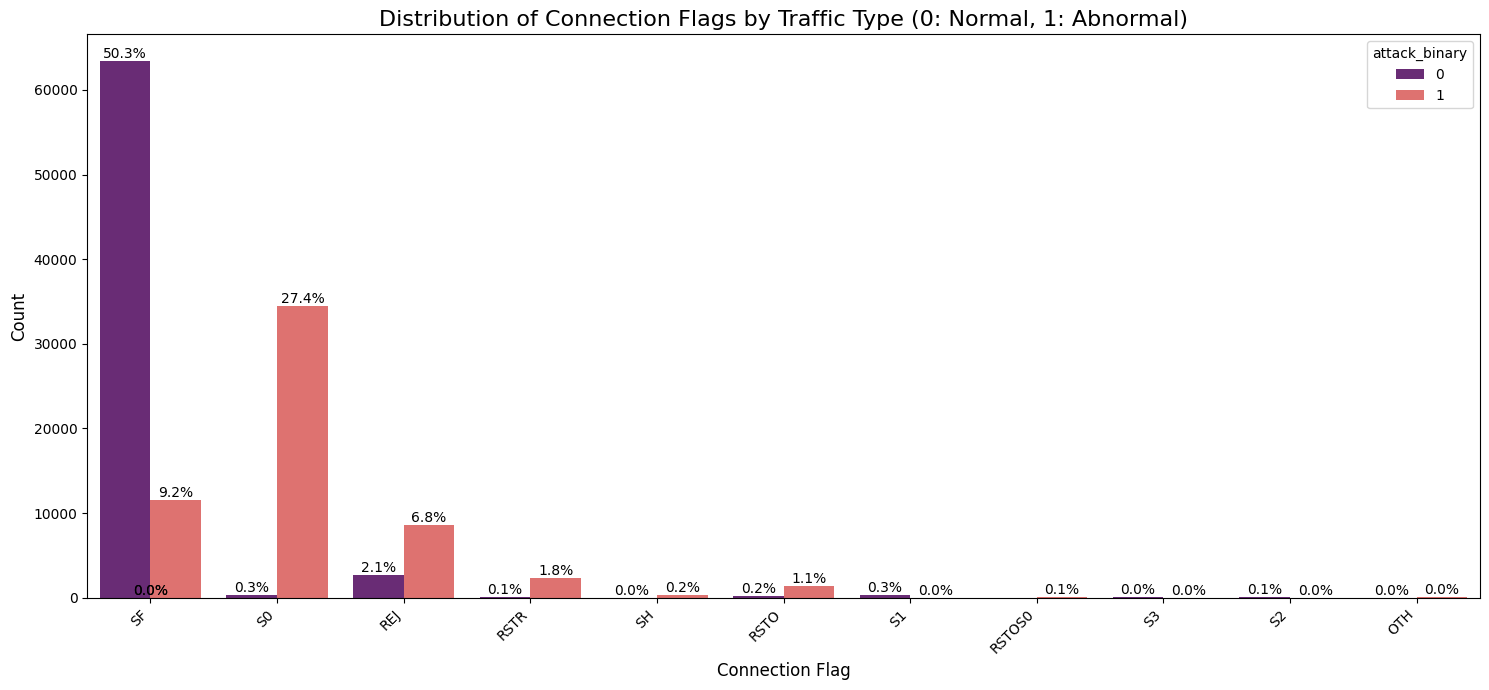

Percentage of Normal Traffic: 53.46%
Percentage of Abnormal (Attack) Traffic: 46.54%


In [13]:
# Count plot for 'flag' with percentage annotations
plt.figure(figsize=(15, 7))
ax = sns.countplot(x='flag', hue='attack_binary', data=train_df, palette='magma')
plt.title('Distribution of Connection Flags by Traffic Type (0: Normal, 1: Abnormal)', fontsize=16)
plt.xlabel('Connection Flag', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping

# Add percentage annotations on top of the bars
total = len(train_df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

# Print percentages of Normal vs. Attack traffic
total_count = len(train_df)
normal_percentage = (train_df['attack_binary'].value_counts(normalize=True).get(0, 0)) * 100
attack_percentage = (train_df['attack_binary'].value_counts(normalize=True).get(1, 0)) * 100

print(f"Percentage of Normal Traffic: {normal_percentage:.2f}%")
print(f"Percentage of Abnormal (Attack) Traffic: {attack_percentage:.2f}%")

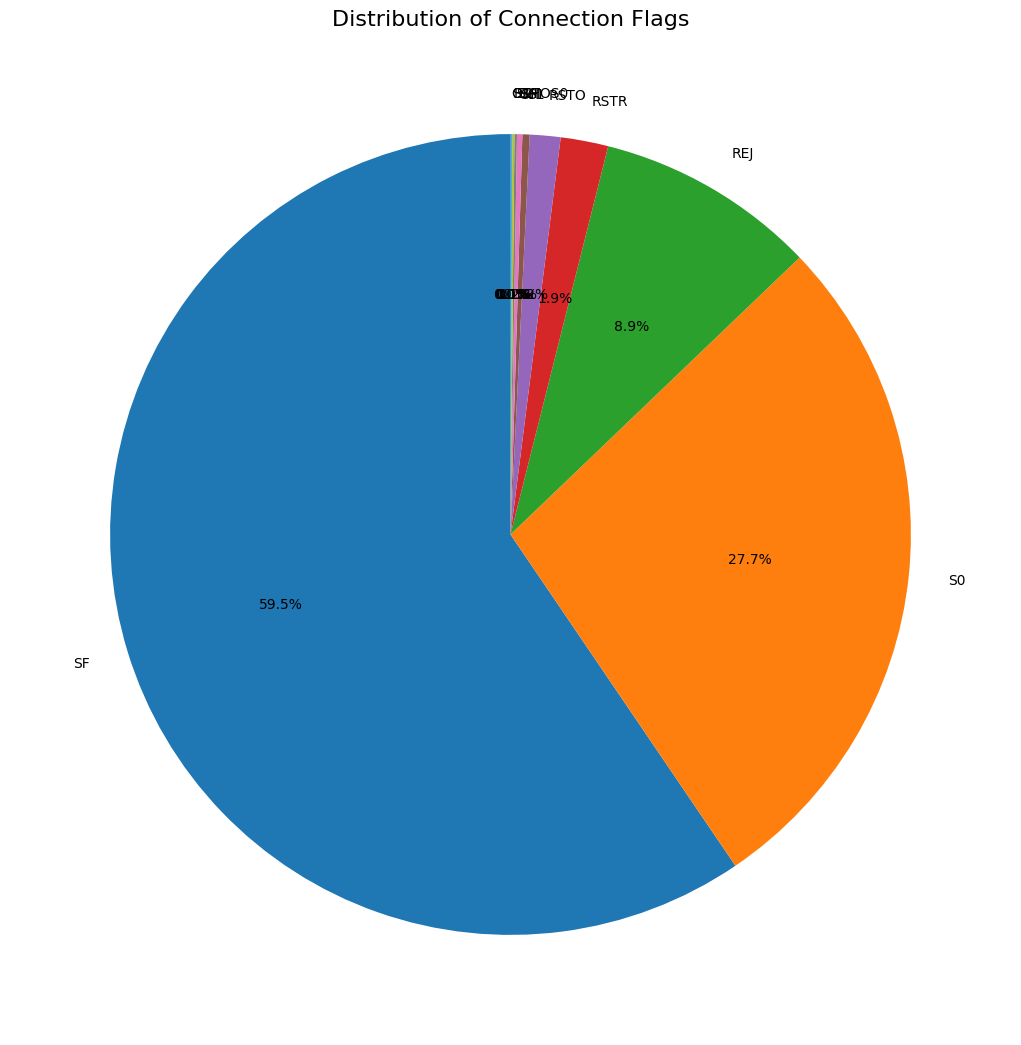

In [15]:
# Pie chart for 'flag'
flag_counts = train_df['flag'].value_counts()

plt.figure(figsize=(20, 13))
plt.pie(
    flag_counts,
    labels=flag_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('tab10')
)
plt.title('Distribution of Connection Flags', fontsize=16)
plt.ylabel('')
plt.show()